In [1]:
'''
This section is to calculate each neighbors SBL. The objects generated in this cell will be used for 
processing and filling NAN values in our original DATASET
'''
import pandas as pd 
import pysal as ps 
import utm 
import geopandas 
df_data = pd.read_csv('../latest_house_data.csv',)

df_data = df_data[df_data['Mismatch dates on multiple document types'] == False]
df_data = df_data[~df_data['LOCATION'].isnull()]
df_data = df_data[df_data['Price']  > 1]
plots= df_data.sort_values(by = 'Actual Date')

sbls = df_data.drop_duplicates('sbl')[['sbl','LOCATION']]
locations_sbls = sbls.LOCATION.apply(lambda x: [ float(n.replace('(','').replace(')',''))  for n in x.split(',')])
sbls['locs'] = locations_sbls.apply(lambda pt: utm.from_latlon(pt[0],pt[1])[:2])
sbls['utm'] = sbls['locs'].apply(lambda pt: [pt[0],pt[1]])
unique_sbls = plots['sbl'].unique()
res_loc = geopandas.GeoDataFrame(sbls, geometry=geopandas.points_from_xy(sbls['locs'].apply(lambda x: x[0]), sbls['locs'].apply(lambda y: y[1])))
res_loc = res_loc.reset_index(drop = True)
tester = geopandas.GeoDataFrame(res_loc).reset_index(drop = True)
w300=ps.lib.weights.DistanceBand.from_dataframe(tester,threshold =300, ids = 'sbl', binary = False, p = 2)
w500=ps.lib.weights.DistanceBand.from_dataframe(tester,threshold =500, ids = 'sbl', binary = False, p = 2)
w80 =ps.lib.weights.DistanceBand.from_dataframe(tester,threshold =100, ids = 'sbl', binary = False, p = 2)

/home/janvolta/.conda/envs/volt_env/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 10005. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/janvolta/.conda/envs/volt_env/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 48 disconnected components.
 There are 32 islands with ids: 123.82-4-23.1, 89.62-4-9./607B, 89.62-4-9./607A, 88.28-5-3, 111.35-5-40.1, 90.62-4-41, 112.75-1-3, 123.77-4-20, 123.70-3-8.1, 77.33-2-16, 79.74-3-3.1, 90.43-2-16.21, 123.56-2-23.11, 90.48-8-47, 100.84-6-19.1, 88.26-3-13.1, 112.27-5-26, 101.37-2-19.1, 112.31-4-8, 122.43-1-8, 112.37-5-18.1, 88.24-2-18, 123.14-4-26.21, 112.34-1-7.1, 133.40-5-58.2, 123.26-1-39, 111.69-2-9./11A, 90.81-1-22.12, 133.30-2-39.11, 133.79-1-32.11, 90.38-2-26.1, 100.71-3-1.11.
  warnings.war

## Section Below's puropose is to grab each neighborhood names 

In [8]:
df_data = pd.read_csv('../latest_house_data.csv',)   
neighborhood_list = df_data['NEIGHBORHOOD'].unique()
neighborhood_dictionary = df_data[['sbl','NEIGHBORHOOD']].drop_duplicates('sbl').set_index('sbl').to_dict()['NEIGHBORHOOD']

In [11]:
neighborhood_list = neighborhood_list[:-1]
#neighborhood_list = neighborhood_list[~np.isnan(neighborhood_list)]
neighborhood_list

array(['University Heights', 'Allentown', 'Elmwood Bryant', 'Hamlin Park',
       'Upper West Side', 'First Ward', 'Kaisertown', 'Broadway Fillmore',
       'Elmwood Bidwell', 'Riverside', 'North Park', 'Parkside', nan,
       'Lovejoy', 'West Side', 'Fruit Belt', 'Pratt-Willert', 'Ellicott',
       'Fillmore-Leroy', 'Masten Park', 'Schiller Park',
       'Seneca-Cazenovia', 'South Park', 'Kensington-Bailey',
       'Delavan Grider', 'MLK Park', 'Central Park', 'Kenfield',
       'Grant-Amherst', 'Lower West Side', 'Black Rock', 'West Hertel',
       'Hopkins-Tifft', 'Genesee-Moselle'], dtype=object)

## We import the data pre-processed that should be used by the random forest classifier 

In [43]:
import numpy as np
import pandas as pd
df  = pd.read_csv('classifier_random_forest_data_updated.csv')
#df = df.drop('This sbl\'s bill percent change from last 3 years ago to last year',axis = 1)
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # we replace all INF values with NAN 
# Dropping all the rows with nan values 
#df.dropna(inplace=True)      # this is to test, we realize that once this is dropped, there were to few items to train, so a solution is fill NAN values with average of neighbors values
df

,SBL,Timedelta,Year,If Bought This Year,Bought The First Three Months This Year,If House is Bought Last Year,If House is Bought Last 2 Years Ago,Number of Houses (80m radius) Houses Bought Last Year,Number of Houses (80m radius) Houses Bought 2 Years Ago,Number of Houses (80m radius) Houses Bought 3 Years Ago,...,Lovejoy,Delavan Grider,Seneca-Cazenovia,Fillmore-Leroy,University Heights,Fruit Belt,MLK Park,Seneca Babcock,Hopkins-Tifft,First Ward
0,100.47-1-16,51590,1995,False,False,False,False,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,99.34-3-21,51590,1995,False,False,False,False,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,99.34-3-22,51590,1995,False,False,False,False,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,112.62-2-12,51590,1995,False,False,False,False,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,99.36-7-13.1,51590,1995,False,False,False,False,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262139,99.42-9-6,60722,2020,True,False,False,False,9.0,6.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1262140,89.69-2-31,60722,2020,True,False,False,False,6.0,2.0,6.0,...,0,0,0,0,0,0,0,0,0,0
1262141,90.83-3-41,60722,2020,True,False,False,False,1.0,3.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1262142,89.30-1-41,60722,2020,True,False,False,False,3.0,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0


## This section we will fill up NAN values with neighbor average

In [4]:
copy_df = df.copy()

In [ ]:
counter = 0
l = 0
from IPython.display import clear_output
bef = 0
def change_null(row,nulls):
    global counter
    global l
    global bef
    print(year)
    print(counter / len(nulls) * 100)
    bef = row.copy
    counter += 1 
    row_copy = row.copy()
    nulls_columns = row[row.isna()].index
    neighbors_x = w500[row['SBL']]
    for col in nulls_columns:
        m = df2[df2['SBL'].isin(neighbors_x)]
        replacement = m[col].dropna().mean()
        row_copy.loc[col] = m[col].dropna().mean()
    l = row_copy
    clear_output()
    return row_copy    
for year in df['Year'].unique():
    df2 = copy_df[copy_df['Year'] == year]
    nulls = df2[pd.isnull(df2).any(axis=1)].copy()
    new_nulls = nulls.apply(lambda magic: change_null(magic,nulls), axis = 1)
   
    copy_df.at[new_nulls.index, new_nulls.columns] = new_nulls 
    counter = 0
    print(year)

In [71]:
# here we try to assign an SBL with a neighborhood
def neigh(x,n):
    try:
        neighborhood = neighborhood_dictionary[x]
        if neighborhood == n:
            return 1
        else:
            return 0
    except:
        return 0

for n in neighborhood_list:  
    df[n] = df['SBL'].apply(lambda x: neigh(x,n))

## This section we try to minimize NAN values

In [ ]:
# I decided to drop these attributes to see whether they will have any difference on the AUC of the model 
# since permit data only goes all the way back to 2009, therefore we lose data before 2009
columns_to_drop = ['Mean Value of work (Permits) in a (500m) radius last year',
'Mean Value of work (Permits) in a (500m) radius last 2 years ago',
'Mean Value of work (Permits) in a (80m) radius last year',
'Mean Value of work (Permits) in a (80m) radius last 2 years ago',
'Average length of time since the last permits issued in a (500m) radius',
'Average length of time since the last permits issued in a (80m) radius'
                  ,'length of homeownership (this house)']
df.drop(columns_to_drop,axis =1,inplace= True)

In [61]:
# here we see that NAN values of each column 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.isna().sum())


SBL                                                                                           0
Timedelta                                                                                     0
Year                                                                                          0
If Bought This Year                                                                           0
Bought The First Three Months This Year                                                       0
If House is Bought Last Year                                                                  0
If House is Bought Last 2 Years Ago                                                           0
Number of Houses (80m radius) Houses Bought Last Year                                         0
Number of Houses (80m radius) Houses Bought 2 Years Ago                                       0
Number of Houses (80m radius) Houses Bought 3 Years Ago                                       0
Number of Houses (80m radius) Houses Bou

In [10]:
copy_df.to_csv('updated_set_all.csv',index = False)  # save the new filled NAN values onto a CSV

In [91]:
import pandas as pd
copy_df = pd.read_csv('updated_set_all_allyears.csv')
copy_df   # we read the new filled NAN values 

,SBL,Timedelta,Year,If Bought This Year,Bought The First Three Months This Year,If House is Bought Last Year,If House is Bought Last 2 Years Ago,Number of Houses (80m radius) Houses Bought Last Year,Number of Houses (80m radius) Houses Bought 2 Years Ago,Number of Houses (80m radius) Houses Bought 3 Years Ago,...,Lovejoy,Delavan Grider,Seneca-Cazenovia,Fillmore-Leroy,University Heights,Fruit Belt,MLK Park,Seneca Babcock,Hopkins-Tifft,First Ward
0,100.47-1-16,51590,1995,False,False,False,False,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,99.34-3-21,51590,1995,False,False,False,False,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,99.34-3-22,51590,1995,False,False,False,False,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,112.62-2-12,51590,1995,False,False,False,False,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,99.36-7-13.1,51590,1995,False,False,False,False,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262139,99.42-9-6,60722,2020,True,False,False,False,9.0,6.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1262140,89.69-2-31,60722,2020,True,False,False,False,6.0,2.0,6.0,...,0,0,0,0,0,0,0,0,0,0
1262141,90.83-3-41,60722,2020,True,False,False,False,1.0,3.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1262142,89.30-1-41,60722,2020,True,False,False,False,3.0,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
cols_to_drop = ['Mean Value of work (Permits) in a (500m) radius last year',                                 
'Mean Value of work (Permits) in a (500m) radius last 2 years ago',                          
'Mean Value of work (Permits) in a (80m) radius last year',                                   
'Mean Value of work (Permits) in a (80m) radius last 2 years ago',                          
'Average length of time since the last permits issued in a (500m) radius',                 
'Average length of time since the last permits issued in a (80m) radius']
df3 = copy_df.dropna(axis =0)   # here we try the experiment said above 

In [78]:
new_df  =  df3
new_df

,SBL,Timedelta,Year,If Bought This Year,Bought The First Three Months This Year,If House is Bought Last Year,If House is Bought Last 2 Years Ago,Number of Houses (80m radius) Houses Bought Last Year,Number of Houses (80m radius) Houses Bought 2 Years Ago,Number of Houses (80m radius) Houses Bought 3 Years Ago,...,Lovejoy,Delavan Grider,Seneca-Cazenovia,Fillmore-Leroy,University Heights,Fruit Belt,MLK Park,Seneca Babcock,Hopkins-Tifft,First Ward
0,100.47-1-16,57434,2011,False,False,False,False,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,99.34-3-21,57434,2011,False,False,False,False,1.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,99.34-3-22,57434,2011,False,False,False,False,2.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4,99.36-7-13.1,57434,2011,False,False,False,False,3.0,9.0,6.0,...,0,0,0,0,0,0,0,0,0,0
5,78.41-5-16,57434,2011,False,False,False,False,3.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485435,99.42-9-6,60722,2020,True,False,False,False,9.0,6.0,2.0,...,0,0,0,0,0,0,0,0,0,0
485436,89.69-2-31,60722,2020,True,False,False,False,6.0,2.0,6.0,...,0,0,0,0,0,0,0,0,0,0
485437,90.83-3-41,60722,2020,True,False,False,False,1.0,3.0,7.0,...,0,0,0,0,0,0,0,0,0,0
485438,89.30-1-41,60722,2020,True,False,False,False,3.0,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
new_df = df
new_df['Average interest of neighbors (500m radius) last year'] = new_df['Average interest of neighbors (500m radius) last year'].fillna(0)
new_df = new_df.dropna(axis= 1)
new_df.columns

/home/janvolta/.conda/envs/volt_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Index(['SBL', 'Timedelta', 'Year', 'If Bought This Year',
       'Bought The First Three Months This Year',
       'If House is Bought Last Year', 'If House is Bought Last 2 Years Ago',
       'Number of Houses (80m radius) Houses Bought Last Year',
       'Number of Houses (80m radius) Houses Bought 2 Years Ago',
       'Number of Houses (80m radius) Houses Bought 3 Years Ago',
       'Number of Houses (80m radius) Houses Bought 4 Years Ago',
       'Number of Houses (300m radius) Houses Bought Last Year',
       'Number of Houses (300m radius) Houses Bought 2 years ago',
       'Number of Houses (300m radius) Houses Bought 3 years ago',
       'Number of Houses (300m radius) Houses Bought 4-5 years ago',
       'Number of Houses (500m radius) Houses Bought last year ago',
       'Number of Houses (500m radius) Houses Bought 2 years ago',
       'Number of Houses (500m radius) Houses Bought 3 years ago',
       'Number of Houses (500m radius) Houses Bought 4-5 years ago',
       'Year

In [35]:
new_df = copy_df.dropna(axis = 0)
new_df

,SBL,Timedelta,Year,If Bought This Year,Bought The First Three Months This Year,If House is Bought Last Year,If House is Bought Last 2 Years Ago,Number of Houses (80m radius) Houses Bought Last Year,Number of Houses (80m radius) Houses Bought 2 Years Ago,Number of Houses (80m radius) Houses Bought 3 Years Ago,...,Lovejoy,Delavan Grider,Seneca-Cazenovia,Fillmore-Leroy,University Heights,Fruit Belt,MLK Park,Seneca Babcock,Hopkins-Tifft,First Ward
0,100.47-1-16,57434,2011,False,False,False,False,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,99.34-3-21,57434,2011,False,False,False,False,1.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,99.34-3-22,57434,2011,False,False,False,False,2.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4,99.36-7-13.1,57434,2011,False,False,False,False,3.0,9.0,6.0,...,0,0,0,0,0,0,0,0,0,0
5,78.41-5-16,57434,2011,False,False,False,False,3.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485435,99.42-9-6,60722,2020,True,False,False,False,9.0,6.0,2.0,...,0,0,0,0,0,0,0,0,0,0
485436,89.69-2-31,60722,2020,True,False,False,False,6.0,2.0,6.0,...,0,0,0,0,0,0,0,0,0,0
485437,90.83-3-41,60722,2020,True,False,False,False,1.0,3.0,7.0,...,0,0,0,0,0,0,0,0,0,0
485438,89.30-1-41,60722,2020,True,False,False,False,3.0,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# imports for the random forest 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingRegressor
from sklearn import metrics
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVC

# Below is the group experiment
## I looped through each possible years and possible neighborhood and
## Saved onto specific folders in our server 
### the file path where it is all saved can be found in 
###                                    ==> data/gentrification/LATEST/model_csvs

In [84]:
path =  "../../../../data/gentrification/LATEST/model_csvs/per_neighborhoods/with_permits/sklearn/diagnostics_scores_imlearn_per_neighborhood.csv"
path2 =  "../../../../data/gentrification/LATEST/model_csvs/per_neighborhoods/with_permits/sklearn/csv_created_by_model_balance_randomforest/"
train_years = [(2015,2016,2019),(2015,2017,2019),(2015,2018,2019),(0,2015,2019),(2009,2015,2019)
               ,(2014,2018,2019),(2017,2018,2019),(2009,2018,2019),(2009,2017,2018),(2015,2017,2018),(2010,2017,2018),(2011,2015,2018),(0,2013,2018)
               ,(0,2012,2018)]  # every possible combination of training and target years 
                                # (training year 1, all the way to training year 2, target year)
new_df = df3

In [85]:
from IPython.display import clear_output
import numpy as np
import imblearn
from sklearn.metrics import roc_auc_score
for i in train_years:
    for neighborhoods in neighborhood_list:
        if neighborhoods != neighborhoods: # this section is just to remove NAN neighborhood value (lazy approach)
            continue 
        new_df2 = new_df[new_df[neighborhoods] == 1].iloc[:,:-35] # we do this since we have to remove the other neighbohood columns in the data set 
        train = new_df2[new_df2['Year'] >= i[0]][new_df2['Year'] <= i[1]] # we only grabbed the training year intervals 
        test = new_df2[new_df2['Year'] == i[2]] # our target year 
        real_test = new_df2[new_df2['Year'] == i[2]]
        columns_to_drop = ['If Bought This Year','SBL','Bought The First Three Months This Year','Year','Year | Month','This house\'s bill last year','Timedelta'
                          ,'length of homeownership (this house)']

        X_test_predictor = test.drop(columns_to_drop, axis =1 )
        y_test_predictor = test['If Bought This Year']
        x = train.drop(columns_to_drop, axis = 1 ) 
        y = train['If Bought This Year']
        X_test_real_predictor = real_test.drop(columns_to_drop, axis =1 )
        y_test_real_predictor = real_test['If Bought This Year']
        ratio = 1 * (len(y[y == False])/len(y[y == True]))

        sample_weight = np.array([ratio if i is False else 1 for i in y]) # weights initialization 
        #--------------------- This section I would often change to different models (so far I used imblearn random forest, and sklearn's random forest )
        model = RandomForestClassifier( n_estimators=300, n_jobs= -1)
        model.fit(x,y,sample_weight=sample_weight)
        # -------------------
        #accuracy_score(y_test_predictor,model.predict(X_test_predictor)  # removed since it will be in the classification report 
        #accuracy_score(y_test_predictor,model.predict(X_test_predictor))
        report = classification_report(y_test_predictor,model.predict(X_test_predictor), output_dict=True)
        #------------------------- SECTION BELOW IS SAVING ONTO A CSV -------------------------------------------
        df = pd.DataFrame(report).transpose().reset_index().rename(columns = {'index':'label'})
        df['Train years'] = str((i[0],i[1]))
        auc = int(roc_auc_score(y_test_predictor.values, model.predict_proba(X_test_predictor)[:,1]) * 100)
        df['Target year'] = str(i[2])
        df['AUC SCORE'] = auc
        df['NEIGHBORHOOD'] = neighborhoods
        df.to_csv(path,index = False, mode = 'a')
        plot = (pd.Series(model.feature_importances_, index=x.columns))
        plt = pd.DataFrame(plot,columns = ['value']).sort_values(by = 'value')
        plt['NEIGHBORHOOD'] = neighborhoods
        plt.to_csv(path2 + "09:IR:Train Year: "+str((i[0],i[1])) + " AUC:" + str(auc)  + " target:" + str(i[2]) + "-"+ neighborhoods +".csv")

        recent_values = model.predict_proba(X_test_real_predictor) # add probabilities predict prob A                                         
        values_for_recent = pd.DataFrame([real_test['SBL'].values,recent_values,real_test['If Bought This Year']],index=['SBL','Probability Of Selling','Truth Value']).T       
        values_for_recent['Target year'] = str(i[2])
        values_for_recent['AUC SCORE'] = auc
        values_for_recent['Neighborhood'] = neighborhoods
        values_for_recent['Train years'] = str((i[0],i[1]))
        values_for_recent['Model Predictions'] = model.predict(X_test_real_predictor)
        values_for_recent.to_csv(path2 + 'IR_09_year:' + str((i[0],i[1])) + "+target:" + str(i[2]) + "-random_forest-"+ neighborhoods + ".csv" ,index=False)
        clear_output()

In [30]:
df = pd.read_csv(path)

In [31]:
df['AUC SCORE'].unique()

array(['51', 'AUC SCORE', '54', '52', '56', '53'], dtype=object)

In [46]:
import os 
list_files  = os.listdir(path2)
list_files = np.array(list_files)  # we try to look for the results with AUC 
new_list = [i for i in list_files if 'AUC' in i]

In [ ]:
i = new_list
df = pd.read_csv(path2 + i[0])
df['Probability Of Selling'] = df['Probability Of Selling'].str.replace('[','').str.replace(']','').str.split()
df = df[df['Truth Value'] == True]
false = df['Probability Of Selling'].apply(lambda x: x[0])
tru =  df['Probability Of Selling'].apply(lambda x: x[1])
sns.distplot(false,color = 'r')
sns.distplot(tru, color = 'g')

In [59]:
all_features = []
for file in new_list:   # we grabbed files with AUC higher than 60 
    if int(file.split()[4].split(':')[1]) > 60:
        df = pd.read_csv(path2 + file)
        df['AUC'] = file.split()[4].split(':')[1]
        
        all_features.append(df)

In [61]:
comb = pd.concat(all_features) # once concatenaed, I tried doing a groupby and taking their mean
comb

,Unnamed: 0,value,NEIGHBORHOOD,AUC
0,"Number of foreclosures in a (80m) radius, from...",0.003014,Allentown,62
1,If House is Bought Last Year,0.007162,Allentown,62
2,Number of permits last 4-5 years ago in a (80m...,0.007991,Allentown,62
3,If House is Bought Last 2 Years Ago,0.008957,Allentown,62
4,"Number of foreclosures in a (300m) radius, fro...",0.010740,Allentown,62
...,...,...,...,...
32,Average length of homeownership (80m radius),0.044190,Fruit Belt,62
33,Average percent change of house price transact...,0.044970,Fruit Belt,62
34,Average length of homeownership (300m radius),0.045174,Fruit Belt,62
35,Average bill of neighbors (500m radius) from l...,0.047313,Fruit Belt,62


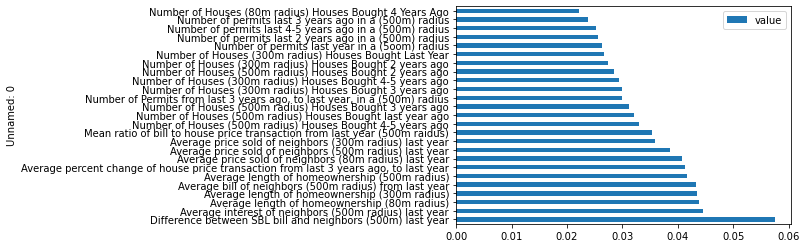

In [70]:
comb[['Unnamed: 0','value']].groupby('Unnamed: 0').mean().nlargest(25,columns = 'value').plot(kind='barh')

In [88]:
#path =  "../../../../data/gentrification/LATEST/model_csvs/diagnostics_scores_imlearn_per_neighborhood.csv"
df2 = pd.read_csv(path)

In [89]:
df2

,label,precision,recall,f1-score,support,Train years,Target year,AUC SCORE,NEIGHBORHOOD
0,False,0.9131985731272295,0.382089552238806,0.5387583304103823,2010.0,"(2015, 2016)",2019,50,University Heights
1,True,0.07726597325408618,0.5875706214689266,0.13657255416940248,177.0,"(2015, 2016)",2019,50,University Heights
2,accuracy,0.39871970736168266,0.39871970736168266,0.39871970736168266,0.39871970736168266,"(2015, 2016)",2019,50,University Heights
3,macro avg,0.4952322731906579,0.4848300868538663,0.3376654422898924,2187.0,"(2015, 2016)",2019,50,University Heights
4,weighted avg,0.8455442200510765,0.39871970736168266,0.5062083155980123,2187.0,"(2015, 2016)",2019,50,University Heights
...,...,...,...,...,...,...,...,...,...
2766,False,0.9157894736842105,0.0576158940397351,0.10841121495327102,1510.0,"(0, 2012)",2018,54,Genesee-Moselle
2767,True,0.12322858903265557,0.9615384615384616,0.2184598580010923,208.0,"(0, 2012)",2018,54,Genesee-Moselle
2768,accuracy,0.1670547147846333,0.1670547147846333,0.1670547147846333,0.1670547147846333,"(0, 2012)",2018,54,Genesee-Moselle
2769,macro avg,0.5195090313584331,0.5095771777890983,0.16343553647718168,1718.0,"(0, 2012)",2018,54,Genesee-Moselle


In [90]:
# take take AUC's above 60
df2[df2['AUC SCORE'].apply(lambda x: True if str.isdigit(x) and int(x) > 60 else False)]

,label,precision,recall,f1-score,support,Train years,Target year,AUC SCORE,NEIGHBORHOOD
1092,False,0.9235033259423503,1.0,0.9602305475504324,833.0,"(2014, 2018)",2019,63,Fillmore-Leroy
1093,True,0.0,0.0,0.0,69.0,"(2014, 2018)",2019,63,Fillmore-Leroy
1094,accuracy,0.9235033259423503,0.9235033259423503,0.9235033259423503,0.9235033259423503,"(2014, 2018)",2019,63,Fillmore-Leroy
1095,macro avg,0.46175166297117515,0.5,0.4801152737752162,902.0,"(2014, 2018)",2019,63,Fillmore-Leroy
1096,weighted avg,0.852858393026583,0.9235033259423503,0.8867761043342685,902.0,"(2014, 2018)",2019,63,Fillmore-Leroy
1668,False,0.9186746987951807,0.993485342019544,0.9546165884194054,307.0,"(2009, 2017)",2018,62,Fruit Belt
1669,True,0.0,0.0,0.0,27.0,"(2009, 2017)",2018,62,Fruit Belt
1670,accuracy,0.9131736526946108,0.9131736526946108,0.9131736526946108,0.9131736526946108,"(2009, 2017)",2018,62,Fruit Belt
1671,macro avg,0.45933734939759036,0.496742671009772,0.4773082942097027,334.0,"(2009, 2017)",2018,62,Fruit Belt
1672,weighted avg,0.8444105764374865,0.9131736526946108,0.8774469839663397,334.0,"(2009, 2017)",2018,62,Fruit Belt


# below are individual experiments conducted 

In [ ]:
columns_to_drop = ['If Bought This Year','SBL','Bought The First Three Months This Year','Year','Year | Month','This house\'s bill last year','Timedelta'
                  ,'length of homeownership (this house)']
train = new_df[new_df['Year'] < 2019].drop(columns_to_drop, axis =1 )
test = new_df[new_df['Year'] == 2019]
real_test = new_df[new_df['Year'] == 2019]


In [ ]:

X_test_predictor = test.drop(columns_to_drop, axis =1 )
y_test_predictor = test['If Bought This Year']
x = train.drop(columns_to_drop, axis = 1 ) 
y = train['If Bought This Year']
X_test_real_predictor = real_test.drop(columns_to_drop, axis =1 )
y_test_real_predictor = real_test['If Bought This Year']

In [48]:
from imblearn.over_sampling import SMOTE
import sklearn 
oversample = SMOTE()
X, Y = oversample.fit_resample(x, y)

In [47]:
import numpy as np
ratio = 1 * (len(y[y == False])/len(y[y == True]))
print(ratio)
sample_weight = np.array([ratio if i is False else 1 for i in y])
len(sample_weight)

11.86913512399533


374672

In [65]:
# randomized sampling 
import random
random_true_samples = random.sample(df3[df3['If Bought This Year'] == True].index.to_list(),k = 33299)
random_false_samples = random.sample(df3[df3['If Bought This Year'] == False].index.to_list(),k = 33299)
lst_combined  = random_true_samples + random_false_samples
d = df3.loc[lst_combined]

In [29]:
x

,If House is Bought Last Year,If House is Bought Last 2 Years Ago,Number of Houses (80m radius) Houses Bought Last Year,Number of Houses (80m radius) Houses Bought 2 Years Ago,Number of Houses (80m radius) Houses Bought 3 Years Ago,Number of Houses (80m radius) Houses Bought 4 Years Ago,Number of Houses (300m radius) Houses Bought Last Year,Number of Houses (300m radius) Houses Bought 2 years ago,Number of Houses (300m radius) Houses Bought 3 years ago,Number of Houses (300m radius) Houses Bought 4-5 years ago,...,Lovejoy,Delavan Grider,Seneca-Cazenovia,Fillmore-Leroy,University Heights,Fruit Belt,MLK Park,Seneca Babcock,Hopkins-Tifft,First Ward
0,False,False,0.0,1.0,0.0,0.0,8.0,16.0,20.0,24.0,...,0,0,0,0,0,0,0,0,0,0
1,False,False,1.0,2.0,3.0,8.0,25.0,20.0,25.0,84.0,...,0,0,0,0,0,0,0,0,0,0
2,False,False,2.0,2.0,3.0,6.0,25.0,20.0,22.0,80.0,...,0,0,0,0,0,0,0,0,0,0
5,False,False,3.0,1.0,2.0,4.0,18.0,14.0,22.0,48.0,...,0,0,0,0,0,0,0,0,0,0
7,False,False,0.0,1.0,2.0,2.0,3.0,10.0,10.0,20.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388347,False,False,2.0,6.0,1.0,12.0,24.0,31.0,38.0,75.0,...,0,0,0,0,0,0,0,0,0,0
388348,False,False,6.0,2.0,2.0,8.0,23.0,25.0,16.0,46.0,...,0,0,0,0,0,0,0,0,0,0
388349,False,False,6.0,3.0,7.0,6.0,30.0,25.0,36.0,57.0,...,0,0,0,0,0,0,0,0,0,0
388350,False,False,1.0,1.0,2.0,2.0,6.0,15.0,17.0,33.0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
model = RandomForestClassifier( n_estimators=300, n_jobs= -1)
model.fit(x,y,sample_weight=sample_weight)
#accuracy_score(y_test_predictor,model.predict(X_test_predictor))

RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [ ]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(n_estimators = 500)
model.fit(x,y,sample_weight = sample_weight)

In [23]:
import imblearn 

model = imblearn.ensemble.BalancedRandomForestClassifier(n_estimators=300, n_jobs= -1)
model.fit(x,y)

BalancedRandomForestClassifier(n_estimators=300, n_jobs=-1)

In [93]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
new_x = sel.fit_transform(x)

In [94]:
new_x

array([[0.0, 1.0, 0.0, ..., 1, 0, 52],
       [1.0, 2.0, 3.0, ..., 13, 0, 54],
       [2.0, 2.0, 3.0, ..., 12, 0, 52],
       ...,
       [6.0, 3.0, 7.0, ..., 0, 0, 155],
       [1.0, 1.0, 2.0, ..., 0, 0, 173],
       [4.0, 1.0, 0.0, ..., 0, 0, 351]], dtype=object)

In [ ]:
# I tried doing grid search 
from sklearn.model_selection import GridSearchCV
param_grid = {'bootstrap': [True,False],
     'max_depth': [80, 90, 100, 110],
     'max_features': [2, 3,10,15,None],
     'min_samples_leaf': [3, 4, 5],
     'min_samples_split': [8, 10, 12],
     'n_estimators': [100, 200, 300, 500,1000]}
# Create the parameter grid based on the results of random search 
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = np.abs(predictions.astype(float) - test_labels.astype(float))
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(x, y, sample_weight = sample_weight)
print(grid_search.best_params_)

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test_predictor, y_test_predictor)
base_accuracy = evaluate(base_model, test_features, test_labels)
#print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

# Classification Report

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
print(confusion_matrix(y_test_predictor,model.predict(X_test_predictor)))
print('\n')
print(classification_report(y_test_predictor,model.predict(X_test_predictor)))


[[43604   934]
 [ 3846    78]]


              precision    recall  f1-score   support

       False       0.92      0.98      0.95     44538
        True       0.08      0.02      0.03      3924

    accuracy                           0.90     48462
   macro avg       0.50      0.50      0.49     48462
weighted avg       0.85      0.90      0.87     48462



# Feature importance 

In [181]:
plot = (pd.Series(model.feature_importances_, index=x.columns)
   .nlargest(19)
   .plot(kind='barh')) 
plot.title.set_text("Train Year: "+str((2015,2013))).savefig('../feature_importances/')

,value
Central,0.000100
First Ward,0.000144
Ellicott,0.000175
Fruit Belt,0.000196
Seneca Babcock,0.000217
...,...
Average length of homeownership (300m radius),0.032088
Average length of time since the last permits issued in a (80m) radius,0.032088
Average interest of neighbors (500m radius) last year,0.032694
Average length of homeownership (80m radius),0.034705


In [24]:
recent_values = model.predict_proba(X_test_real_predictor) # add probabilities predict prob A  

In [25]:
values_for_recent = pd.DataFrame([real_test['SBL'].values,recent_values],index=['SBL','Probability Of Selling']).T

In [26]:
df_data = pd.read_csv('../latest_house_data.csv',)

In [27]:
new_map = df_data[['sbl','NEIGHBORHOOD','LOCATION','Census Code (GEOIDs)','CENSUS TRACT','CENSUS BLOCK GROUP','LATITUDE','LONGITUDE']].set_index('sbl').to_dict()

In [28]:
df_data.columns

Index(['Owner Name/Buyer', 'sbl', 'doc type', 'deed page(search parcel)',
       'deed page(public records)', 'date(public records)',
       'date(search parcel)', 'NEIGHBORHOOD', 'CENSUS TRACT',
       'CENSUS BLOCK GROUP', 'LOCATION', 'Year', 'Price', 'Actual Date',
       'Address', 'LONGITUDE', 'LATITUDE', 'House Number', 'Street Name',
       'Multiple Doc Types', 'Seller',
       'Mismatch dates on multiple document types', 'Complete Address',
       'present-day owner address', 'Zip Code', 'Census Code (GEOIDs)'],
      dtype='object')

In [60]:
# save prediction probability onto a csv
values_for_recent.to_csv('home-buying-prediction-2020.csv',index=False)

In [30]:
for key in new_map.keys():
    values_for_recent[key] = values_for_recent['SBL'].map(new_map[key])

In [29]:
# classification report on a .55 threshold
threshold = .55
predicted_proba = model.predict_proba(X_test_predictor)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
print(classification_report(y_test_predictor,predicted))   

              precision    recall  f1-score   support

       False       0.92      0.82      0.87     42777
        True       0.10      0.21      0.13      3757

    accuracy                           0.77     46534
   macro avg       0.51      0.52      0.50     46534
weighted avg       0.86      0.77      0.81     46534



In [103]:
# classification report on a .65 threshold
threshold = .65
predicted_proba = model.predict_proba(X_test_real_predictor)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

In [45]:
values_for_recent['If Bought with threshold .65'] = predicted

In [47]:
values_for_recent.to_csv('home-buying-prediction-2020',index=False)

In [3]:
import pandas as pd
df = pd.read_csv('home-buying-prediction-2020')

In [7]:
df['Probability Of not being bought 2019'] = df['Probability Of Selling'].apply(lambda x: x[0])

In [26]:
df['Probability Of not being bought 2019'] = df['Probability Of Selling'].apply(lambda x:  x.split()[0][1:] )

In [29]:
df.rename(columns = {'If Bought with threshold .65':'was bought 2019'}, inplace = True)

In [31]:
df.to_csv('updated-home-buying2020.csv',index = False)

In [68]:
predicted_proba [:,0]

array([0.46311111, 0.465     , 0.44      , ..., 0.445     , 0.44142857,
       0.61833333])

In [172]:
import pandas as pd 
df_data = pd.read_csv('../../tax_data_analysis/Strictly_Residential.csv')

In [184]:
len(df_data['SBL'].unique())

66955

In [55]:
interesting==> 
'train_year:(0, 2006)+target:2019-random_forest.csv'
